In [125]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

import os
import pickle
import re

from tqdm import tqdm
from tqdm import tnrange
from tqdm import tqdm_notebook

import sklearn.ensemble as ske
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.tools.plotting import autocorrelation_plot
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt
from datetime import timedelta

import json
import plotly.plotly as py
from plotly.graph_objs import *

from fuzzywuzzy import fuzz

import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings



In [126]:
with open('hourly_data.pkl', 'rb') as f:
    hourlyData = pickle.load(f)

In [127]:
hourlyData.head(20)

,Count,Duration,Year,Month,Week,Day,Hour,Quarter,DayOfWeek,WorkDay,Holiday,DayOfYear,Season,TempF,TempC,Humidity,WindSpeed,WindDirection,Pressure,Precip
Time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,4,416.500000,2015,1,1,1,0,1,3,1,1,1,4,22.0,-5.6,50.0,10.0,220.0,30.07,0.0
2015-01-01 01:00:00,3,768.333333,2015,1,1,1,1,1,3,1,1,1,4,22.0,-5.6,50.0,10.0,230.0,30.05,0.0
2015-01-01 02:00:00,1,338.000000,2015,1,1,1,2,1,3,1,1,1,4,22.0,-5.6,50.0,11.0,230.0,30.03,0.0
2015-01-01 03:00:00,0,0.000000,2015,1,1,1,3,1,3,1,1,1,4,24.0,-4.4,46.0,13.0,240.0,30.01,0.0
2015-01-01 04:00:00,1,429.000000,2015,1,1,1,4,1,3,1,1,1,4,22.0,-5.6,52.0,15.0,230.0,30.00,0.0
2015-01-01 05:00:00,0,0.000000,2015,1,1,1,5,1,3,1,1,1,4,23.0,-5.0,48.0,17.0,240.0,30.02,0.0
2015-01-01 06:00:00,0,0.000000,2015,1,1,1,6,1,3,1,1,1,4,23.0,-5.0,50.0,14.0,240.0,30.02,0.0
2015-01-01 07:00:00,0,0.000000,2015,1,1,1,7,1,3,1,1,1,4,22.0,-5.6,52.0,13.0,230.0,30.05,0.0
2015-01-01 08:00:00,4,784.000000,2015,1,1,1,8,1,3,1,1,1,4,25.0,-3.9,44.0,16.0,240.0,30.06,0.0


In [128]:
plt.style.use('seaborn')

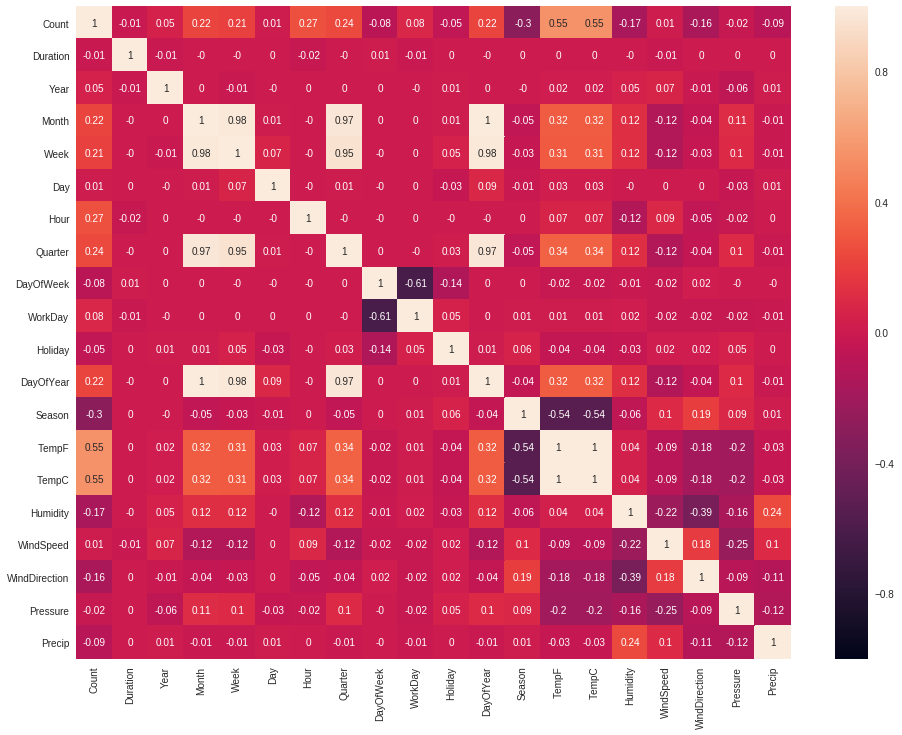

In [133]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(hourlyData.corr().round(2), ax=ax, annot=True, vmin=-1, vmax=1)

### Random Forest Model

In [145]:
hourlyData.head()

,Count,Duration,Year,Month,Week,Day,Hour,Quarter,DayOfWeek,WorkDay,Holiday,DayOfYear,Season,TempF,TempC,Humidity,WindSpeed,WindDirection,Pressure,Precip
Time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,4,416.500000,2015,1,1,1,0,1,3,1,1,1,4,22.0,-5.6,50.0,10.0,220.0,30.07,0.0
2015-01-01 01:00:00,3,768.333333,2015,1,1,1,1,1,3,1,1,1,4,22.0,-5.6,50.0,10.0,230.0,30.05,0.0
2015-01-01 02:00:00,1,338.000000,2015,1,1,1,2,1,3,1,1,1,4,22.0,-5.6,50.0,11.0,230.0,30.03,0.0
2015-01-01 03:00:00,0,0.000000,2015,1,1,1,3,1,3,1,1,1,4,24.0,-4.4,46.0,13.0,240.0,30.01,0.0
2015-01-01 04:00:00,1,429.000000,2015,1,1,1,4,1,3,1,1,1,4,22.0,-5.6,52.0,15.0,230.0,30.00,0.0


In [146]:
hourlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2015-01-01 00:00:00 to 2017-12-31 23:00:00
Freq: H
Data columns (total 20 columns):
Count            26304 non-null int64
Duration         26304 non-null float64
Year             26304 non-null int64
Month            26304 non-null int64
Week             26304 non-null int64
Day              26304 non-null int64
Hour             26304 non-null int64
Quarter          26304 non-null int64
DayOfWeek        26304 non-null int64
WorkDay          26304 non-null int64
Holiday          26304 non-null int64
DayOfYear        26304 non-null int64
Season           26304 non-null int64
TempF            26304 non-null float64
TempC            26304 non-null float64
Humidity         26304 non-null float64
WindSpeed        26304 non-null float64
WindDirection    26304 non-null float64
Pressure         26304 non-null float64
Precip           26304 non-null float64
dtypes: float64(8), int64(12)
memory usage: 5.5 MB


In [147]:
import numpy as np 
import pandas as pd 
from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [148]:
X_train, X_test, y_train, y_test = train_test_split(hourlyData.drop(columns='Count'), hourlyData.Count, 
                                                    test_size=0.33, random_state=129)

In [149]:
regressor = RandomForestRegressor(random_state=129, max_depth=20)

In [150]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=129, verbose=0, warm_start=False)

In [151]:
regressor.predict(X_test).round(0)

array([   7.,   36.,   43., ...,    2.,   92.,  318.])

In [152]:
regressor.score(X_test, y_test)

0.95061280280444216

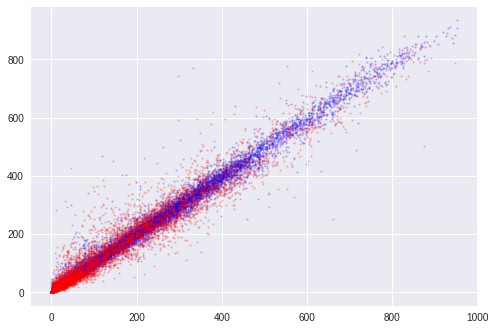

In [153]:
plt.plot(y_train, regressor.predict(X_train), 'bo', alpha=0.3, ms=2)
plt.plot(y_test, regressor.predict(X_test), 'ro', alpha = 0.3, ms=2)

In [154]:
regressor.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

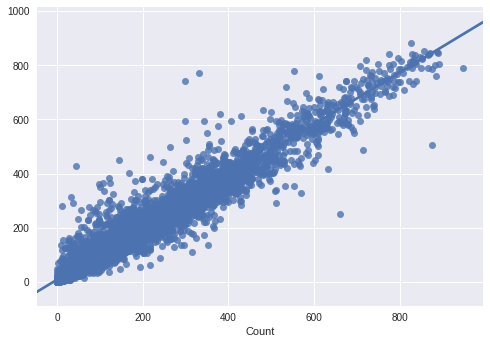

In [163]:
sn.regplot(y_test, regressor.predict(X_test))

/home/cneiderer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



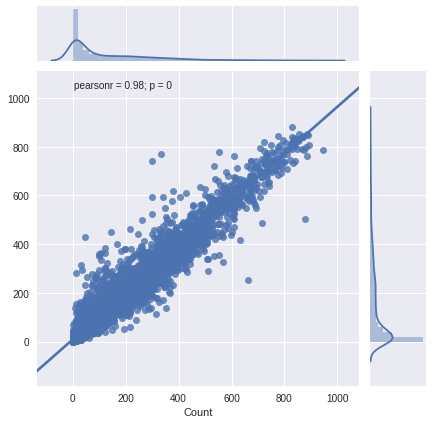

In [156]:
sn.jointplot(y_test, regressor.predict(X_test), kind='reg')

In [157]:
import statsmodels.api as sm

In [191]:
poisson_mdl = sm.GLM(y_train, X_train, family=sm.families.Poisson())

In [192]:
poisson_results = poisson_mdl.fit()

In [193]:
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Count   No. Observations:                17623
Model:                            GLM   Df Residuals:                    17604
Model Family:                 Poisson   Df Model:                           18
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -8.1548e+05
Date:                Fri, 30 Mar 2018   Deviance:                   1.5346e+06
Time:                        13:00:31   Pearson chi2:                 1.02e+16
No. Iterations:                     8                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Duration      -1.089e-05   2.76e-07    -39.495      0.000   -1.14e-05   -1.04e-05
Year              0.0043      0.000     21.575      0.000       0.004       0.005
Month             0.4460      0.038     11.803      0.000       0.372       0.520
Week             -0.0277      0.001    -23.876      0.000      -0.030      -0.025
Day               0.0141      0.001     11.494      0.000       0.012       0.017
Hour              0.0452      0.000    422.422      0.000       0.045       0.045
Quarter           0.2074      0.003     81.569      0.000       0.202       0.212
DayOfWeek        -0.0234      0.000    -53.383      0.000      -0.024      -0.023
WorkDay           0.2458      0.003     97.306      0.000       0.241       0.251
Holiday          -0.3377      0.004    -79.593      0.000      -0.346      -0.329
DayOfYear        -0.0091      0.001     -7.757      0.000      -0.011      -0.007
Season           -0.2459      0.001   -225.407      0.000      -0.248      -0.244
TempF            -0.3618      0.012    -29.939      0.000      -0.385      -0.338
TempC             0.7081      0.022     32.557      0.000       0.665       0.751
Humidity         -0.0120   4.02e-05   -297.780      0.000      -0.012      -0.012
WindSpeed         0.0112      0.000     84.232      0.000       0.011       0.011
WindDirection    -0.0025   7.89e-06   -320.111      0.000      -0.003      -0.003
Pressure          0.2226      0.003     64.035      0.000       0.216       0.229
Precip           -4.4155      0.053    -83.584      0.000      -4.519      -4.312
=================================================================================
"""

In [198]:
a = poisson_results.predict(X_test)

In [188]:
negbin_mdl = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial())

In [189]:
negbin_results = negbin.fit()

In [190]:
negbin_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Count   No. Observations:                 8681
Model:                            GLM   Df Residuals:                     8662
Model Family:        NegativeBinomial   Df Model:                           18
Link Function:                    log   Scale:                   1.32277791493
Method:                          IRLS   Log-Likelihood:                -46702.
Date:                Fri, 30 Mar 2018   Deviance:                       11511.
Time:                        13:00:02   Pearson chi2:                 1.15e+04
No. Iterations:                    16                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Duration      -2.148e-06      1e-06     -2.143      0.032   -4.11e-06   -1.84e-07
Year              0.0062      0.004      1.609      0.108      -0.001       0.014
Month             1.1571      0.601      1.926      0.054      -0.021       2.335
Week             -0.0046      0.004     -1.261      0.207      -0.012       0.003
Day               0.0399      0.020      2.017      0.044       0.001       0.079
Hour              0.0743      0.002     40.412      0.000       0.071       0.078
Quarter           0.4007      0.048      8.371      0.000       0.307       0.495
DayOfWeek        -0.0452      0.008     -5.670      0.000      -0.061      -0.030
WorkDay           0.2845      0.045      6.307      0.000       0.196       0.373
Holiday          -0.4927      0.071     -6.958      0.000      -0.631      -0.354
DayOfYear        -0.0382      0.020     -1.934      0.053      -0.077       0.001
Season           -0.2140      0.015    -14.157      0.000      -0.244      -0.184
TempF            -0.4468      0.236     -1.897      0.058      -0.908       0.015
TempC             0.8756      0.424      2.065      0.039       0.045       1.707
Humidity         -0.0138      0.001    -18.216      0.000      -0.015      -0.012
WindSpeed         0.0058      0.003      2.236      0.025       0.001       0.011
WindDirection    -0.0021      0.000    -14.798      0.000      -0.002      -0.002
Pressure          0.1419      0.058      2.432      0.015       0.028       0.256
Precip           -3.9267      0.580     -6.774      0.000      -5.063      -2.791
=================================================================================
"""

In [220]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [209]:
k_means = KMeans(init='k-means++', n_clusters=5)

In [213]:
k_results = k_means.fit(hourlyData)

In [223]:
# try out a range of cluster sizes to find the one with the best inertia and silhouette scores
inertias = []
silhouettes = []
n_clusters = np.arange(2, 12, 2)
for n in tnrange(len(n_clusters)):
    kmeans = KMeans(n_clusters=n_clusters[n], init="k-means++", random_state=129)
    kmeans.fit(hourlyData)
    inertias.append(kmeans.inertia_)
    
    # only a sample was used to calculate silhouette score because of memory errors
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(hourlyData, labels, metric='euclidean', sample_size=10000))

A Jupyter Widget

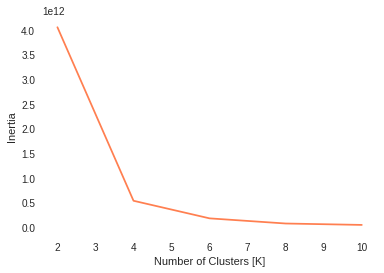

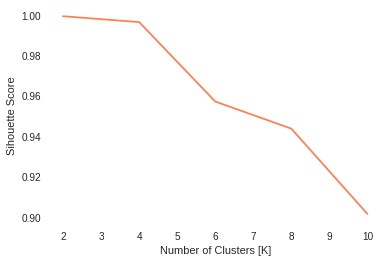

In [224]:
# plot the inertia scores and look for the kink in the curve
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_clusters, inertias, color='coral')
ax.grid(linestyle=':', linewidth=1, alpha=0.5)
ax.set_xlabel('Number of Clusters [K]')
ax.set_ylabel('Inertia');
ax.set_frame_on(0)

# plot the silhouettte scores
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_clusters, silhouettes, color='coral')
ax.grid(linestyle=':', linewidth=1, alpha=0.5)
ax.set_xlabel('Number of Clusters [K]')
ax.set_ylabel('Sihouette Score');
ax.set_frame_on(0)

In [237]:
import pandas as pd
from bokeh.charts import output_file, Chord
from bokeh.io import show
from bokeh.sampledata.les_mis import data
 
nodes = data['nodes']
links = data['links']
 
nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)
 
source_data = links_df.merge(nodes_df, how='left', left_on='source', right_index=True)
source_data = source_data.merge(nodes_df, how='left', left_on='target', right_index=True)
source_data = source_data[source_data["value"] > 5]
source_data
 
chord_from_df = Chord(source_data, source="name_x", target="name_y", value="value")
output_file('chord-diagram-bokeh.html', mode="inline")
show(chord_from_df)


ModuleNotFoundError: No module named 'bokeh.charts'

In [239]:
import bokeh

In [240]:
bokeh.__version__

'0.12.10'